In [9]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#Create your dataset
data = {
    'text': [
        "I love this product! It's amazing.",
        "This is the worst experience I've ever had.",
        "Absolutely fantastic! Highly recommend it.",
        "Not bad, could be better.",
        "Terrible service, not coming back.",
        "Great quality and fast shipping!",
        "Horrible, do not buy this!",
        "Pretty decent, worth the money.",
        "Awful. I want a refund!",
        "Excellent value for the price!"
    ],
    'sentiment': [1, 0, 1, 1, 0, 1, 0, 1, 0, 1]  # 1 = Positive, 0 = Negative
}

df = pd.DataFrame(data)

In [ ]:
# Preprocess text data
def preprocess_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)  # remove mentions
    text = re.sub(r"#\w+", "", text)  # remove hashtags
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    text = re.sub(r"\d+", "", text)  # remove numbers
    text = text.strip()
    return text

df["clean_text"] = df["text"].apply(preprocess_text)

In [5]:
# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)           # remove URLs
    text = re.sub(r"@\w+", "", text)              # remove mentions
    text = re.sub(r"#\w+", "", text)              # remove hashtags
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    text = re.sub(r"\d+", "", text)               # remove numbers
    text = text.strip()
    return text


In [6]:
# Apply the cleaning function
df['clean_text'] = df['text'].apply(clean_text)

In [7]:
# Prepare features and labels
X = df['clean_text']
y = df['sentiment']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Vectorization with TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

In [11]:
# Evaluate model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.0

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


✅ Confusion Matrix:
 [[0 2]
 [0 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

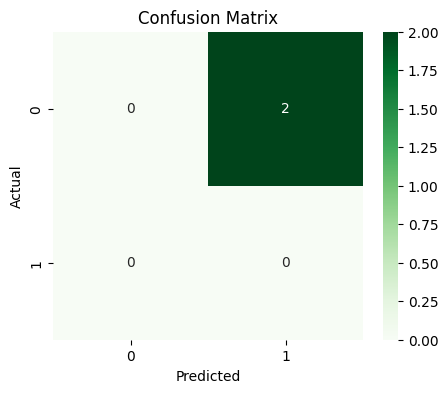

In [12]:
# Confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()